In [1]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [2]:
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian(G,k):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        d = nx.shortest_path_length(G, source=n[0], target=n[1])
        if d==k:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        #else:
            #L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
def zeta_function(eiglst, s):
    sum=0
    s = -1*s
    for n in eiglst[1:]:
        sum = sum+pow(n,s)
    return sum

[(-2.2204460492503131e-16+0j), (0.82991351337396602+0j), (1.9999999999999996+0j), (2.6888921825340177+0j), (4.4811943040920168+0j)]
[(-2.2204460492503131e-16+0j), (0.97680775806901021+0j), (2.1493612051035917+0j), (2.7983603709456317+0j), (4.4959852059011665+0j)]
[(-4.4408920985006262e-16+0j), (0.88152281449512415+0j), (2.0549469166662027+0j), (2.728892741241526+0j), (4.4861201430603463+0j)]
[(4.4408920985006262e-16+0j), (0.84835347192287192+0j), (2.0202138409972568+0j), (2.7035487175633688+0j), (4.4828937142494878+0j)]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


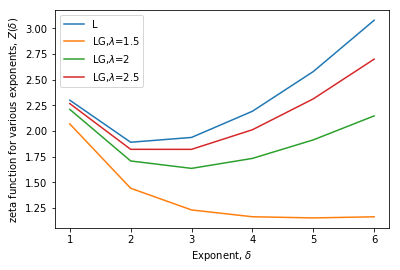

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_ltf(G,1.5)))
l3 = sorted(eigvals(kplaplacian_ltf(G,2)))
l4 = sorted(eigvals(kplaplacian_ltf(G,2.5)))

print(l1)
print(l2)
print(l3)
print(l4)
ss =[1,2,3,4,5,6]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))


plt.plot(ss,z_l1, label='L')
plt.plot(ss,z_l2, label='LG,$\lambda$=1.5')
plt.plot(ss,z_l3, label='LG,$\lambda$=2')
plt.plot(ss,z_l4, label='LG,$\lambda$=2.5')
plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

[(-2.2204460492503131e-16+0j), (0.82991351337396602+0j), (1.9999999999999996+0j), (2.6888921825340177+0j), (4.4811943040920168+0j)]
[(-4.4408920985006262e-16+0j), (1.649887071724468+0j), (2.7499999999999996+0j), (3.2483610059608217+0j), (4.5739741445369333+0j)]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


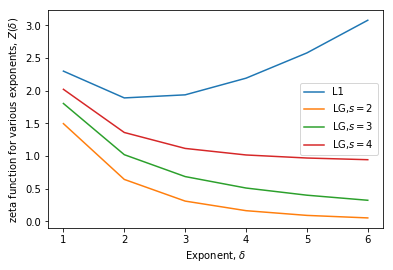

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_mtf(G,2)))
l3 = sorted(eigvals(kplaplacian_mtf(G,3)))
l4 = sorted(eigvals(kplaplacian_mtf(G,4)))

print(l1)
print(l2)
ss =[1,2,3,4,5,6]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$s=2$')
plt.plot(ss,z_l3, label='LG,$s=3$')
plt.plot(ss,z_l4, label='LG,$s=4$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

[(-6.9937316094190174e-18+0j), (0.19088555527618711+0j), (0.51880569590798509+0j), (0.73736890818443779+0j), (1.0000000000000009+0j), (2.3111078174659831+0j), (2.3929534325862845+0j), (3.3312027481691793+0j), (4.1700864866260323+0j), (5.3475893557839207+0j)]
[(4.4408920985006262e-16+0j), (0.99928011904472436+0j), (1.6664318700257141+0j), (2.1037307097116598+0j), (2.4358333333333322+0j), (3.3748094286676569+0j), (3.5402663547847553+0j), (4.5251395242150689+0j), (5.0539642176026671+0j), (6.0927666648366614+0j)]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


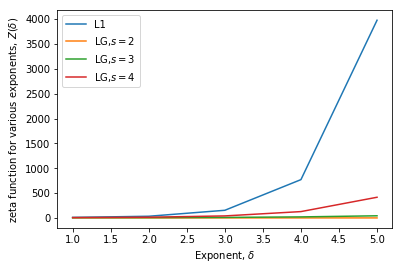

In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_mtf(G,2)))
l3 = sorted(eigvals(kplaplacian_mtf(G,3)))
l4 = sorted(eigvals(kplaplacian_mtf(G,4)))

print(l1)
print(l2)
ss =[1,2,3,4,5]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$s=2$')
plt.plot(ss,z_l3, label='LG,$s=3$')
plt.plot(ss,z_l4, label='LG,$s=4$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

[(-6.9937316094190174e-18+0j), (0.19088555527618711+0j), (0.51880569590798509+0j), (0.73736890818443779+0j), (1.0000000000000009+0j), (2.3111078174659831+0j), (2.3929534325862845+0j), (3.3312027481691793+0j), (4.1700864866260323+0j), (5.3475893557839207+0j)]
[(1.1910577978690645e-15+0j), (0.27709776177428808+0j), (0.67982287090550408+0j), (0.94926766589684186+0j), (1.2355070996329971+0j), (2.4821049692092085+0j), (2.5714257893076025+0j), (3.5425347107978657+0j), (4.2954822506820989+0j), (5.4626789602294803+0j)]


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


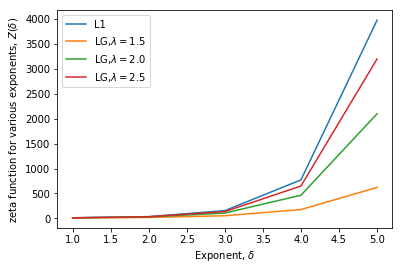

In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_ltf(G,1.5)))
l3 = sorted(eigvals(kplaplacian_ltf(G,2.0)))
l4 = sorted(eigvals(kplaplacian_ltf(G,2.5)))

print(l1)
print(l2)
ss =[1,2,3,4,5]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$\lambda=1.5$')
plt.plot(ss,z_l3, label='LG,$\lambda=2.0$')
plt.plot(ss,z_l4, label='LG,$\lambda=2.5$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

[-2.220446049250313e-16, 1.9999999999999996, 2.0000000000000013, 3.9999999999999982]
[-2.3841135204472906e-16, 1.381966011250104, 1.381966011250105, 3.6180339887498922, 3.618033988749894]


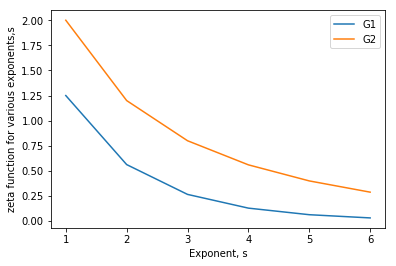

In [23]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
from numpy.linalg import eig

G1 = nx.Graph([(1,2),(2,3),(3,4),(4,1)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,1)])

v1,w1 = eig(nx.laplacian_matrix(G1).todense())
v2,w2 = eig(nx.laplacian_matrix(G2).todense())
lG1 = sorted(v1.tolist())
lG2 = sorted(v2.tolist())


ss =[1,2,3,4,5,6]
z_G1 = []
z_G2 = []
z_G3 = []
z_G4 = []
for s in ss:
    z_G1.append(zeta_function(lG1, s))
    z_G2.append(zeta_function(lG2, s))
   #z_l1.append(zeta_function(l1, s)) 
   #z_l2.append(zeta_function(l2, s)) 
   #z_l3.append(zeta_function(l3, s)) 
   #z_l4.append(zeta_function(l4, s))

print(lG1)
print(lG2)

plt.plot(ss,z_G1, label='G1')
plt.plot(ss,z_G2, label='G2')
#plt.plot(ss,z_l3, label='LG,$\lambda$=2')
#plt.plot(ss,z_l4, label='LG,$\lambda$=2.5')
plt.xlabel('Exponent, s')
plt.ylabel('zeta function for various exponents,s')
plt.legend()
plt.show()

In [29]:
m1 = np.mean(z_G1)
m2 = np.mean(z_G2)
print(m1,m2)

0.383666992187 0.874666666667


In [30]:
z_G1m = [x - m1 for x in z_G1]
z_G2m = [x - m2 for x in z_G2]

S = np.column_stack((z_G1m, z_G2m))
S

array([[ 0.86633301,  1.12533333],
       [ 0.17883301,  0.32533333],
       [-0.11804199, -0.07466667],
       [-0.25476074, -0.31466667],
       [-0.32019043, -0.47466667],
       [-0.35217285, -0.58666667]])

In [31]:
St = np.transpose(S)
St

array([[ 0.86633301,  0.17883301, -0.11804199, -0.25476074, -0.32019043,
        -0.35217285],
       [ 1.12533333,  0.32533333, -0.07466667, -0.31466667, -0.47466667,
        -0.58666667]])

In [15]:
z_G1[:] = [x - m1 for x in z_G1]
z_G2[:] = [x - m2 for x in z_G2]

S = np.column_stack((z_G1, z_G2))
S

array([[ 1.25      ,  2.        ],
       [ 0.5625    ,  1.2       ],
       [ 0.265625  ,  0.8       ],
       [ 0.12890625,  0.56      ],
       [ 0.06347656,  0.4       ],
       [ 0.03149414,  0.288     ]])

In [32]:
SSt = np.matmul(S,St )
SSt

array([[ 2.01690799,  0.52103738, -0.18628856, -0.57481253, -0.81154976,
        -0.96529452],
       [ 0.52103738,  0.13782302, -0.04540136, -0.14793119, -0.21168551,
        -0.25384235],
       [-0.18628856, -0.04540136,  0.01950902,  0.05356758,  0.07323769,
         0.08537563],
       [-0.57481253, -0.14793119,  0.05356758,  0.16391815,  0.23093373,
         0.27432426],
       [-0.81154976, -0.21168551,  0.07323769,  0.23093373,  0.32783036,
         0.39123349],
       [-0.96529452, -0.25384235,  0.08537563,  0.27432426,  0.39123349,
         0.4682035 ]])

In [33]:
from numpy import linalg as LA
w, v = LA.eig(SSt)
print(v)

[[-0.80328691+0.j         -0.46585727+0.j         -0.37108914+0.j
   0.12780955-0.0114562j   0.12780955+0.0114562j  -0.10974303+0.j        ]
 [-0.20838972+0.j          0.00123222+0.j          0.44954886+0.j
  -0.04136138-0.41725753j -0.04136138+0.41725753j -0.01561014+0.j        ]
 [ 0.07345635+0.j         -0.52131783+0.j          0.49544209+0.j
  -0.30521582+0.03909816j -0.30521582-0.03909816j  0.48606156+0.j        ]
 [ 0.22878176+0.j         -0.55465866+0.j          0.20106860+0.j
   0.77719609+0.j          0.77719609-0.j         -0.61130930+0.j        ]
 [ 0.32377232+0.j         -0.40286900+0.j         -0.19510841+0.j
  -0.10715575+0.05164796j -0.10715575-0.05164796j -0.45405854+0.j        ]
 [ 0.38566621+0.j         -0.20310970+0.j         -0.57986200+0.j
  -0.06909013-0.30012736j -0.06909013+0.30012736j  0.41423271+0.j        ]]


In [37]:
v[:,:3]

array([[-0.80328691+0.j, -0.46585727+0.j, -0.37108914+0.j],
       [-0.20838972+0.j,  0.00123222+0.j,  0.44954886+0.j],
       [ 0.07345635+0.j, -0.52131783+0.j,  0.49544209+0.j],
       [ 0.22878176+0.j, -0.55465866+0.j,  0.20106860+0.j],
       [ 0.32377232+0.j, -0.40286900+0.j, -0.19510841+0.j],
       [ 0.38566621+0.j, -0.20310970+0.j, -0.57986200+0.j]])

array([[ 5.5625    ,  3.103125  ,  1.93203125,  1.28113281,  0.8793457 ,
         0.61536768],
       [ 3.103125  ,  1.75640625,  1.10941406,  0.74450977,  0.51570557,
         0.36331545],
       [ 1.93203125,  1.10941406,  0.71055664,  0.48224072,  0.33686096,
         0.23876563],
       [ 1.28113281,  0.74450977,  0.48224072,  0.33021682,  0.23218253,
         0.16533979],
       [ 0.8793457 ,  0.51570557,  0.33686096,  0.23218253,  0.16402927,
         0.11719914],
       [ 0.61536768,  0.36331545,  0.23876563,  0.16533979,  0.11719914,
         0.08393588]])

In [8]:
k = np.matrix([[1,-0.5,0,-0.5],[-0.5,1,-0.5,0],[0,-0.5,1,-0.5],[-0.5,0,-0.5,1]])
e1,ve = eig(k)
print(e1)

[ -1.11022302e-16   1.00000000e+00   2.00000000e+00   1.00000000e+00]


In [9]:
k = np.matrix([[1,-0.5,0,0,-0.5],[-0.5,1,-0.5,0,0],[0,-0.5,1,-0.5,0],[0,0,-0.5,1,-0.5],
               [-0.5,0,0,-0.5,1]])
e1,ve = eig(k)
print(e1)

[  1.80901699e+00   6.90983006e-01  -1.19205676e-16   1.80901699e+00
   6.90983006e-01]


In [10]:
k = np.matrix([[2,-1,0,-1],[-1,2,-1,0],[0,-1,2,-1],[-1,0,-1,2]])
e1,ve = eig(k)
print(e1)

[ -2.22044605e-16   2.00000000e+00   4.00000000e+00   2.00000000e+00]


In [11]:
k = np.matrix([[2,-1,0,0,-1],[-1,2,-1,0,0],[0,-1,2,-1,0],[0,0,-1,2,-1],
               [-1,0,0,-1,2]])
e1,ve = eig(k)
print(e1)

[  3.61803399e+00   1.38196601e+00  -2.38411352e-16   3.61803399e+00
   1.38196601e+00]
